In [49]:
# Automatically reload modules when they change
%reload_ext autoreload
%autoreload 2

Loading dataset

In [50]:
from nn import *
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import copy


In [51]:
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [52]:
X, y = housing_data = fetch_california_housing(return_X_y=True)
print(X.shape, y.shape)
print(y.mean(), y.std(), y.min(), y.max())
print(type(y), y.dtype)
print(X[0], y[0])

(20640, 8) (20640,)
2.0685581690891475 1.153928204041225 0.14999 5.00001
<class 'numpy.ndarray'> float64
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ] 4.526


Data exploration: Domain Knowledge, Data Cleaning/Preprocessing, Feature Creation/Construction/Transformation (Sums, Average, Check Existence, Log/Exp), Feature Encoding/Standardization (Scaling, One-Hot-Encodind, Flattening), Feature Selection (Identify Most Relevant Features)

In [53]:
column_mapping = {
    "MedInc": 0,
    "HouseAge": 1,
    "AveRooms": 2,
    "AveBedrms": 3,
    "Population": 4,
    "AveOccup": 5,
    "Latitude": 6,
    "Longitude": 7
}

In [61]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Compute correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

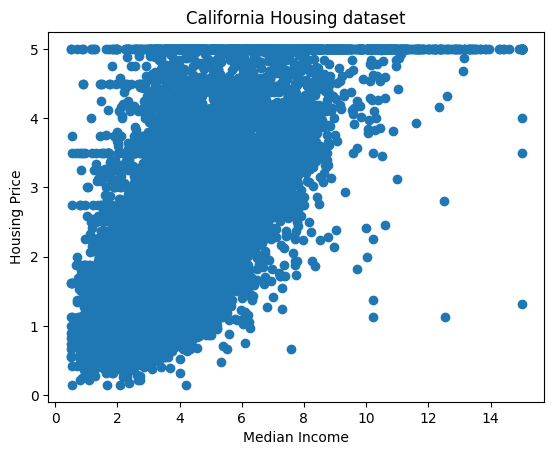

In [54]:
plt.scatter(X[:, 0], y)
plt.xlabel("Median Income")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

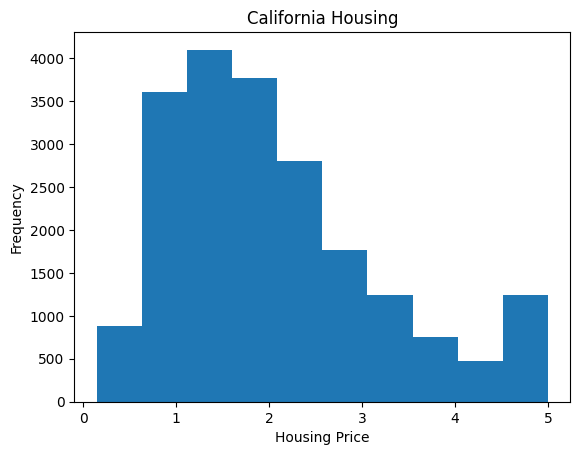

In [55]:
plt.hist(y)
plt.xlabel("Housing Price")
plt.ylabel("Frequency")
plt.title("California Housing")
plt.show()

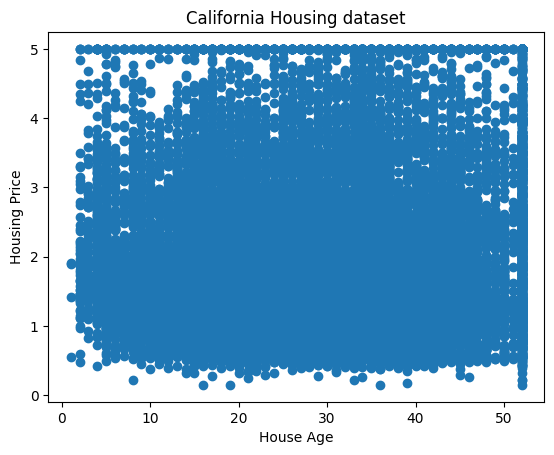

In [56]:
plt.scatter(X[:, column_mapping["HouseAge"]], y)
plt.xlabel("House Age")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

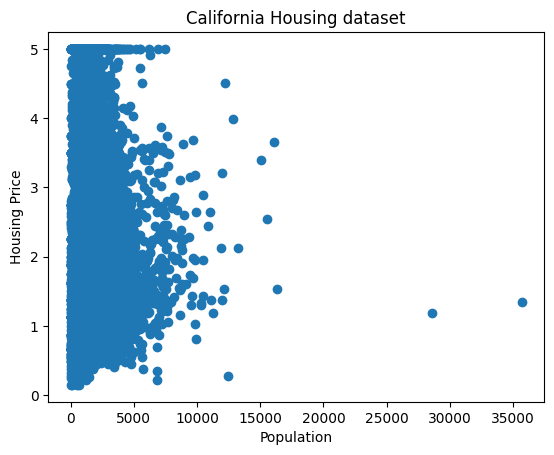

In [57]:
plt.scatter(X[:, column_mapping["Population"]], y)
plt.xlabel("Population")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

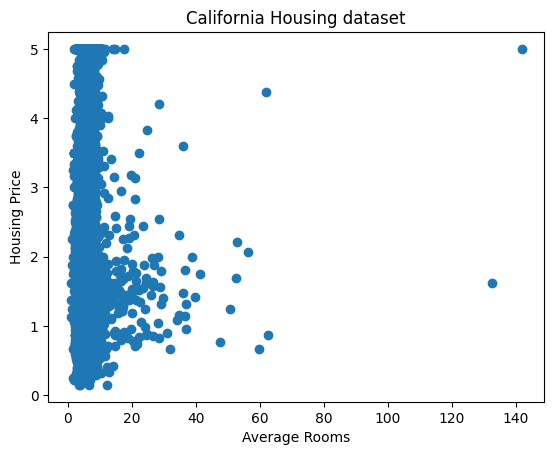

In [58]:
plt.scatter(X[:, column_mapping["AveRooms"]], y)
plt.xlabel("Average Rooms")
plt.ylabel("Housing Price")
plt.title("California Housing dataset")
plt.show()

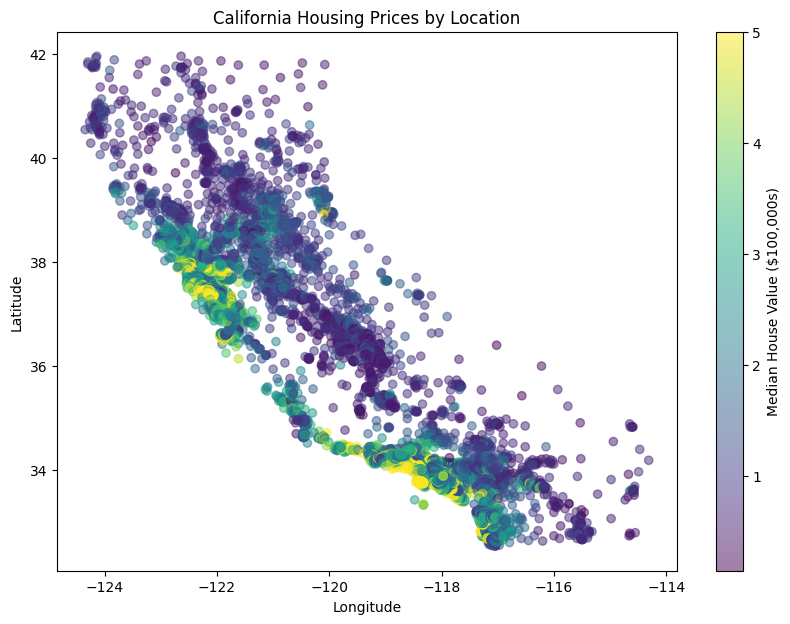

In [48]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame  # pandas DataFrame with features + target

# Scatter plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(df["Longitude"], df["Latitude"],
                 c=df["MedHouseVal"], cmap="viridis", alpha=0.5)
plt.colorbar(sc, label="Median House Value ($100,000s)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("California Housing Prices by Location")
plt.show()

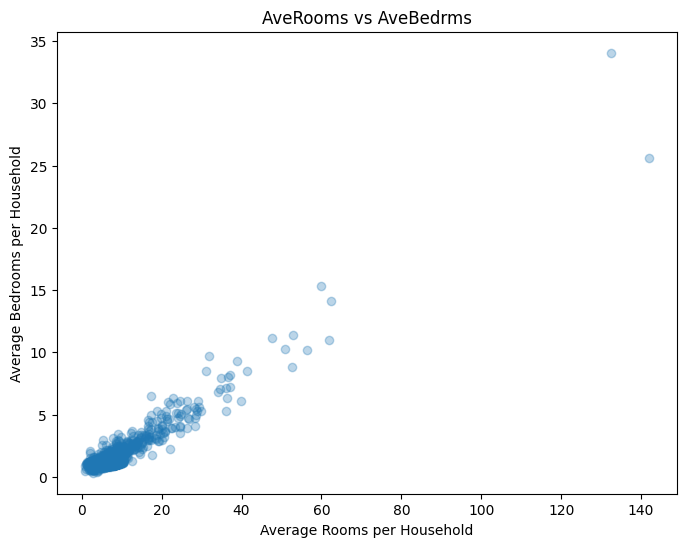

           AveRooms  AveBedrms
AveRooms   1.000000   0.847621
AveBedrms  0.847621   1.000000


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["AveRooms"], df["AveBedrms"], alpha=0.3)
plt.xlabel("Average Rooms per Household")
plt.ylabel("Average Bedrooms per Household")
plt.title("AveRooms vs AveBedrms")
plt.show()

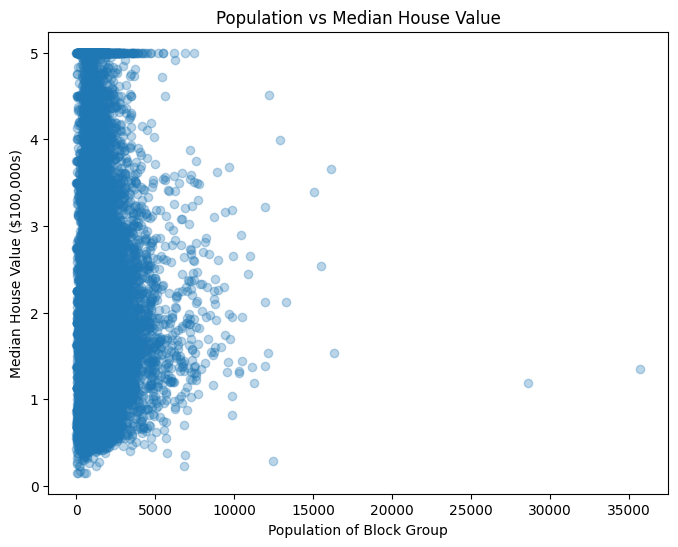

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["MedHouseVal"], alpha=0.3)
plt.xlabel("Population of Block Group")
plt.ylabel("Median House Value ($100,000s)")
plt.title("Population vs Median House Value")
plt.show()

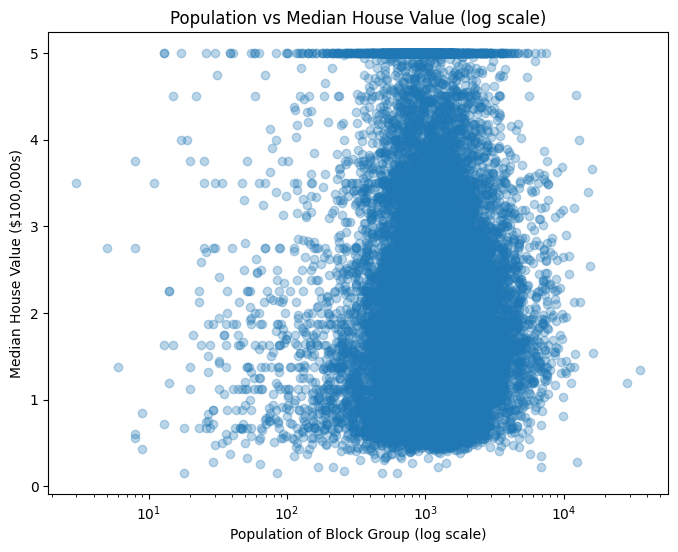

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["MedHouseVal"], alpha=0.3)
plt.xscale("log")  # log-scale for population
plt.xlabel("Population of Block Group (log scale)")
plt.ylabel("Median House Value ($100,000s)")
plt.title("Population vs Median House Value (log scale)")
plt.show()

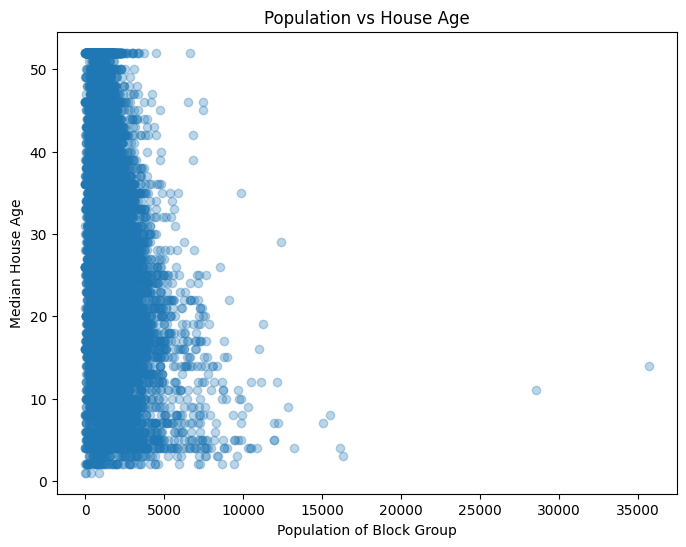

In [67]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["HouseAge"], alpha=0.3)
plt.xlabel("Population of Block Group")
plt.ylabel("Median House Age")
plt.title("Population vs House Age")
plt.show()

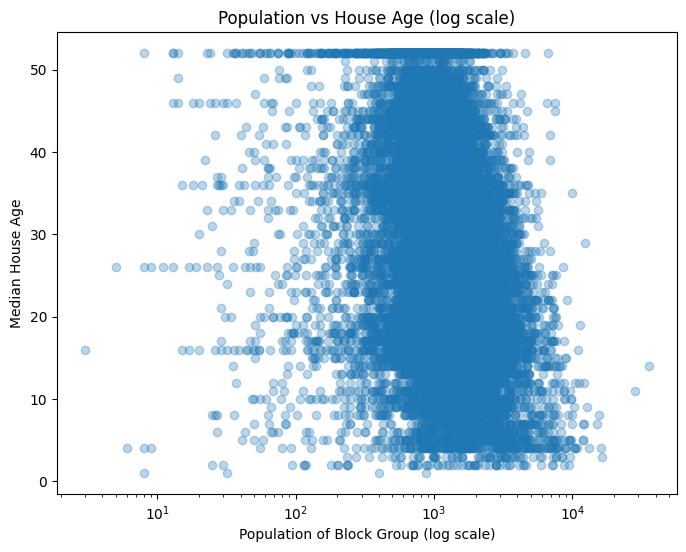

In [66]:
plt.figure(figsize=(8,6))
plt.scatter(df["Population"], df["HouseAge"], alpha=0.3)
plt.xscale("log")  # log-scale for population
plt.xlabel("Population of Block Group (log scale)")
plt.ylabel("Median House Age")
plt.title("Population vs House Age (log scale)")
plt.show()

Data Split

In [64]:
num_datapoints = 200
num_train = int(num_datapoints * 0.8)
num_val = int(num_datapoints * 0.1)
num_test = int(num_datapoints * 0.1)

trainX, trainY = X[:num_train], y[:num_train]
valX, valY = X[num_train:num_train + num_val], y[num_train:num_train + num_val]
testX, testY = X[num_train + num_val:], y[num_train + num_val:]

print(len(trainX), len(trainY), len(valX), len(valY), len(testX), len(testY))

160 160 20 20 20460 20460


Selecting Model

In [ ]:
nn = NeuralNetwork([
    FullyConnected(2, 16, init=HeKaiming()),
    ReLU(),
    FullyConnected(16, 32, init=HeKaiming()),
    ReLU(),
    Dropout(0.5),
    FullyConnected(32, 1, init=RandomNormal(0.01, 0.01)),
    Sigmoid()
])

TypeError: RandomNormal.__init__() missing 2 required positional arguments: 'mean' and 'std'

Hyperparameter Turning (Use Cross Validation) 
* Loss Function
* Optimizer (learning_rate, weight_decay, ...)
* Number of Epoch
* Model Specific (Initializations, Number of Neurons/Layers)

In [ ]:
learning_rate = 0.005
weight_decay = 0.00

num_epochs = 2500

loss_fn = LogLinear()
optimizer = Adam(learning_rate=learning_rate, weight_decay=weight_decay)
metric = Accuracy()

Train Model With Best Hyperparameters (Use Cross Validation to Select the Best Model)

In [ ]:
nn.init_params()

best_model = None
best_val_acc = 0.0

for epoch in range(num_epochs):
    nn.train(trainX, trainY, loss_fn, optimizer)
    loss = loss_fn.loss_value

    if (epoch + 1) % 100 == 0 or epoch == 0:
        train_acc = nn.evaluate(trainX, trainY, metric)
        val_acc = nn.evaluate(valX, valY, metric)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model = copy.deepcopy(nn)

Evaluate the Model with Test

In [ ]:
test_acc = best_model.evaluate(testX, testY, metric)

print(f"Test Accuracy: {test_acc:.4f}")